# Bài tập 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

In [3]:
def load_data_from_file(fileName = "dataset/advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    
    intercept = np.ones((features_X.shape[0], 1))
    features_X = np.concatenate((intercept, features_X), axis=1)
    return features_X, sales_Y

In [4]:
# question 2
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [5]:
# question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


# Bài tập 2

In [7]:
def create_individual(n=4, bound=10):
    individual = []
    for _ in range(n):
        individual.append((random.random() - 0.5)*bound)
    return individual

individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


# Bài tập 3

In [8]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)    
    return fitness_value

In [9]:
# question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


# Bài tập 4

In [10]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    return individual1_new, individual2_new

In [11]:
# question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual 1: ", individual1)
print("individual 2: ", individual2)

individual 1:  [3.44, 2.57, -0.79, -2.41]
individual 2:  [4.09, 4.82, 3.1, 4.02]


# Bài tập 5

In [12]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = (random.random() - 0.5)*10
            
    return individual_m

In [13]:
# question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


# Bài tập 6

In [14]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

# Bài tập 7

In [17]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if(index2 != index1):
            break   
    
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

# Bài tập 8

In [24]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen % 1 == 0:
        print("Best loss: ", compute_loss(sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individualS1 = selection(sorted_population, m)
        individualS2 = selection(sorted_population, m) # duplication
        
        # crossover
        individualC1, individualC2 = crossover(individualS1, individualS2)
        
        # mutation
        individualM1 = mutate(individualC1)
        individualM2 = mutate(individualC2)
        
        new_population.append(individualM1)
        new_population.append(individualM2)
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population, compute_loss(sorted_population[m-1])

In [19]:
# question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss:  123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


# Bài tập 9

In [31]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    
    for i in range(n_generations):
        population, losses = create_new_population(population, 2, i)
        losses_list.append(losses)
    return losses_list, population

# Bài tập 10

In [37]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, c="green")
    plt.xlabel("Generations")
    plt.ylabel("Loss")
    plt.show()

Best loss:  457.1240854404501 with chromosome:  [0.13843726146639312, 0.08971007263456454, -0.9171520976470149, 0.9243710164904373]
Best loss:  454.6448204101147 with chromosome:  [-0.11041957611983233, 0.08971007263456454, -0.9171520976470149, 0.9243710164904373]
Best loss:  454.6448204101147 with chromosome:  [-0.11041957611983233, 0.08971007263456454, -0.9171520976470149, 0.9243710164904373]
Best loss:  201.74378835334764 with chromosome:  [2.6737246029710615, -0.04862797235013927, 0.274885134092393, 0.08521777891836169]
Best loss:  201.74378835334764 with chromosome:  [2.6737246029710615, -0.04862797235013927, 0.274885134092393, 0.08521777891836169]
Best loss:  182.83614357628733 with chromosome:  [2.6737246029710615, -0.04862797235013927, 0.3250683415332378, 0.08521777891836169]
Best loss:  61.94060664512537 with chromosome:  [-1.6139531252057349, 0.12915831116991017, -0.21804307605704287, 0.08521777891836169]
Best loss:  61.94060664512537 with chromosome:  [-1.6139531252057349, 0

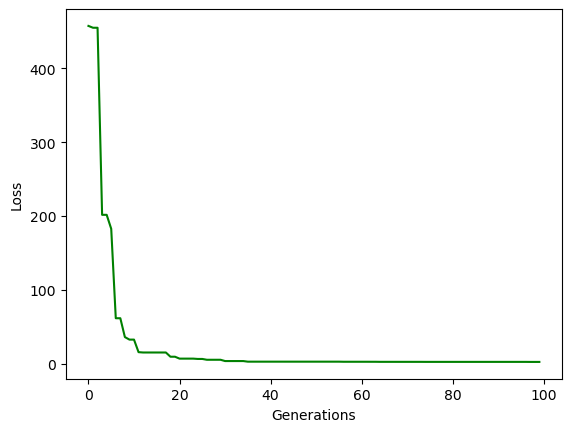

In [38]:
losses_list, population = run_GA()
visualize_loss(losses_list)

# Bài tập 11

[3.7830960987782247, 0.05607054732225558, 0.1280264412488752, -0.004515189223409655]


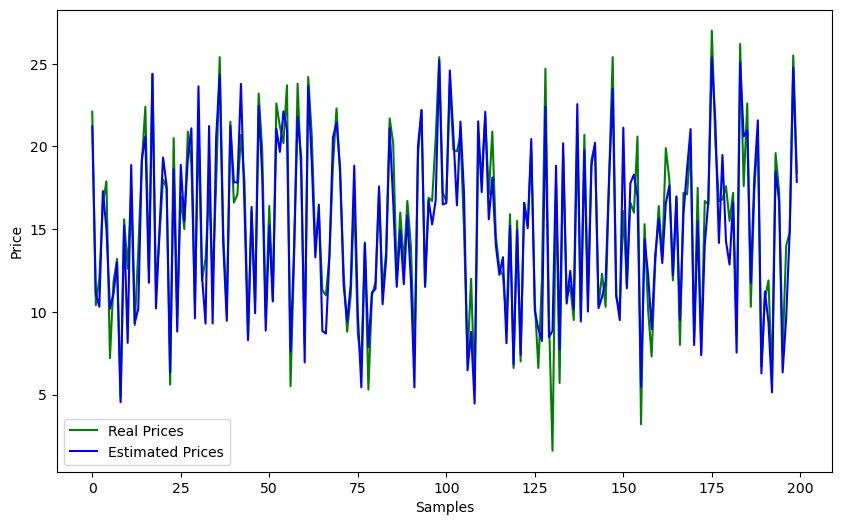

In [40]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])
    
    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c*x for c, x in zip(theta, feature))
        estimated_prices.append(estimated_price)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Samples")
    plt.ylabel("Price")
    plt.plot(sales_Y, c="green", label="Real Prices")
    plt.plot(estimated_prices, c="blue", label="Estimated Prices")
    plt.legend()
    plt.show()

visualize_predict_gt()